https://github.com/henrysky/milkyway_plot

https://github.com/MariusCautun/Milky_Way_mass_profile

In [1]:
# !pip install astropy mw_plot

In [2]:
import thesis_plots
thesis_plots.print_versions(
    'thesis_plots astropy mw_plot galpy thesis_plots'.split(),
    return_string=False,
    print_output=False,
    )

,module,version,path,git
0,python,3.10.4,/home/joran/yes/envs/py3.10/bin/python,None
1,thesis_plots,0.1.3,/home/joran/software/thesis_plots/thesis_plots,branch:recoil_spectra | cacde4f
2,astropy,5.0.4,/home/joran/yes/envs/py3.10/lib/python3.10/sit...,None
3,mw_plot,0.9.0,/home/joran/yes/envs/py3.10/lib/python3.10/sit...,None
4,galpy,1.7.2,/home/joran/yes/envs/py3.10/lib/python3.10/sit...,None
5,thesis_plots,0.1.3,/home/joran/software/thesis_plots/thesis_plots,branch:recoil_spectra | cacde4f


In [3]:
thesis_plots.setup_plt()

/home/joran/yes/envs/py3.10/lib/python3.10/site-packages/galpy/util/bovy_conversion.py:6: FutureWarning: galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9
  warnings.warn('galpy.util.bovy_conversion is being deprecated in favor of galpy.util.conversion; all functions in there are the same; please switch to the new import, because the old import will be removed in v1.9',FutureWarning)



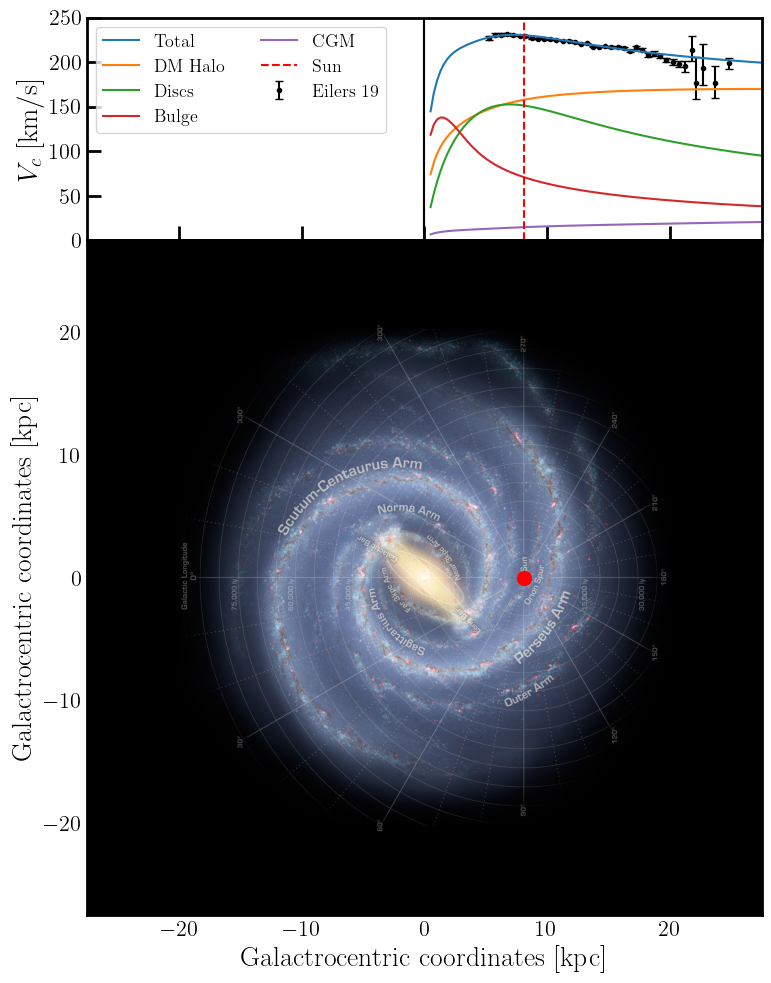

In [4]:
thesis_plots.combined_milkiway_plot()
thesis_plots.save_fig('rot_curve_mw', dpi=200)